<a href="https://colab.research.google.com/github/ClarisseAlvarenga/data_science_alura_cursos/blob/master/Curso_Alura_Pandas_IO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 01

## Criando os nomes

In [0]:
import pandas as pd

In [0]:
#importando 200 nomes femininos e masculinos
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=F')
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')

In [3]:
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [4]:
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [5]:
print("Quantidade de nomes: " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [0]:
frames = [nomes_f, nomes_m]

In [0]:
nomes = pd.concat(frames)['nome'].to_frame()

In [8]:
nomes.sample(5)

,nome
148,APARECIDO
104,REINALDO
171,TERESINHA
146,SAMARA
143,MAIARA


In [9]:
nomes.shape

(400, 1)

##**Incluindo ID dos alunos**

In [0]:
import numpy as np

In [0]:
#gerando números aleatórios mas sempre os mesmos
np.random.seed(123)

In [12]:
total_alunos = len(nomes)
total_alunos

400

In [0]:
#criando o ID
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [14]:
nomes

,nome,id_aluno
0,MARIA,235
1,ANA,43
2,FRANCISCA,304
3,ANTONIA,156
4,ADRIANA,343
...,...,...
195,WALTER,231
196,ARLINDO,99
197,MICHAEL,323
198,ALVARO,383


In [15]:
#criando domínios de email
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)
nomes.sample(5)

,nome,id_aluno,dominio
46,FABIANA,358,@servicodoemail.com
38,DIEGO,294,@dominiodoemail.com.br
136,NILTON,271,@dominiodoemail.com.br
119,MOISES,4,@servicodoemail.com
101,GISELE,298,@servicodoemail.com


In [0]:
#criando os emails concatenando o nome com o domínio, tudo em letra minúscula
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [17]:
nomes.sample(5)

,nome,id_aluno,dominio,email
42,MARLENE,268,@servicodoemail.com,marlene@servicodoemail.com
76,TATIANE,203,@servicodoemail.com,tatiane@servicodoemail.com
65,MAURICIO,395,@servicodoemail.com,mauricio@servicodoemail.com
52,SAMUEL,220,@dominiodoemail.com.br,samuel@dominiodoemail.com.br
187,ELTON,97,@dominiodoemail.com.br,elton@dominiodoemail.com.br


#Aula 02

## Criando a tabela cursos

In [18]:
!pip install html5lib
!pip install lxml

pd.read_html('http://tabela-cursos.herokuapp.com/index.html')

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [0]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [20]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [21]:
type(cursos)

list

In [0]:
#transformando lista em DataFrame
cursos = cursos[0]

In [23]:
type(cursos)

pandas.core.frame.DataFrame

In [24]:
cursos.head(10)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [0]:
#alterando o index de cursos

cursos.rename(columns={'Nome do curso': 'nome_do_curso'}, inplace=True)

In [26]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [0]:
#criando ID dos cursos
cursos['id'] = cursos.index + 1

In [28]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [0]:
#usando o inplace True pra não setar a variável novamente
cursos.set_index('id', inplace=True)

In [30]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


#Aula 03

##Matriculando Alunos nos cursos

In [0]:
#criando uma coluna matrícula, atribuindo um valor aleatório acima de 1, com distribuição exponencial, de tipo inteiro
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)*1.5).astype(int)

In [32]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
194,CLARA,277,@servicodoemail.com,clara@servicodoemail.com,3
64,ROBSON,290,@servicodoemail.com,robson@servicodoemail.com,2
13,DANIEL,195,@servicodoemail.com,daniel@servicodoemail.com,4
98,GILSON,134,@dominiodoemail.com.br,gilson@dominiodoemail.com.br,1
33,NATALIA,192,@dominiodoemail.com.br,natalia@dominiodoemail.com.br,1


In [33]:
nomes.matriculas.describe()

count    400.000000
mean       2.017500
std        1.422058
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

In [34]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


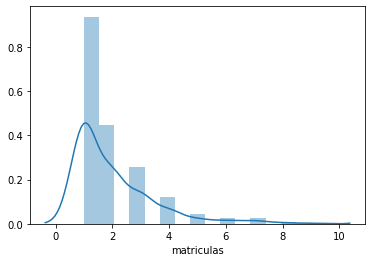

In [35]:
#visualizando a distribuição
sns.distplot(nomes.matriculas)

In [36]:
#verificando quantos alunos fizeram quantos cursos
nomes.matriculas.value_counts()

1    200
2     95
3     55
4     26
5      9
7      6
6      6
8      2
9      1
Name: matriculas, dtype: int64

## Selecionando os cursos

In [0]:
#criando variáveis para fazer um cálculo aleatório de cursos
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [0]:
#iterrows é uma função que devolve linha a linha
for index, row in nomes.iterrows():
  #puxando o ID e a quantidade de matrículas do aluno do DF por linha
  id = row.id_aluno
  matriculas = row.matriculas
  #fazendo o laço para colocar os cursos
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)] #escolhe um curso aleatório pela id
    todas_matriculas.append(mat) #incluindo no array

  matriculas = pd.DataFrame(todas_matriculas, columns=['id_aluno', 'id_curso']) #novo dataframe com id do aluno e id do curso



In [39]:
matriculas.head()

,id_aluno,id_curso
0,235,13
1,43,6
2,43,2
3,304,5
4,156,13


In [40]:
#gerando a quantidade de alunos por cursos e juntando com o nome do curso e renomeando a coluna id_aluno para quantidade_de_alunos
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
2,39,Java para Web
3,18,C# para Web
4,6,Ruby on Rails
5,64,Cursos de Python
6,32,PHP com MySql
7,18,.NET para web
8,114,Novas integrações com Java
9,26,TDD com Java
10,7,Código limpo com C#


In [41]:
#revendo nossos DataFrames:
nomes.head()

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,2
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,1
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com,1
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,3


In [42]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [43]:
matriculas.head()

,id_aluno,id_curso
0,235,13
1,43,6
2,43,2
3,304,5
4,156,13


In [44]:
#criando mais um
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
2,39,Java para Web
3,18,C# para Web
4,6,Ruby on Rails
5,64,Cursos de Python
6,32,PHP com MySql


##Saída em diferentes formatos

In [0]:
#Criar um CSV
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [46]:
#ler o arquivo
pd.read_csv('/content/matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,39,Java para Web
1,18,C# para Web
2,6,Ruby on Rails
3,64,Cursos de Python
4,32,PHP com MySql
5,18,.NET para web
6,114,Novas integrações com Java
7,26,TDD com Java
8,7,Código limpo com C#
9,49,Preparatório para certificação Java


In [0]:
#Criando um JSON

matriculas_json = matriculas_por_curso.to_json()

In [48]:
print(matriculas_json)

{"quantidade_de_alunos":{"2":39,"3":18,"4":6,"5":64,"6":32,"7":18,"8":114,"9":26,"10":7,"11":49,"12":86,"13":88,"14":13,"15":42,"16":22,"17":100,"18":26,"19":18,"20":39},"nome_do_curso":{"2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\u00e7\u00f5es com Java","9":"TDD com Java","10":"C\u00f3digo limpo com C#","11":"Preparat\u00f3rio para certifica\u00e7\u00e3o Java","12":"Hardware b\u00e1sico","13":"Persist\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\u00e1lise de dados","16":"Estat\u00edstica b\u00e1sica","17":"Internet das coisas","18":"Programa\u00e7\u00e3o funcional","19":"Boas pr\u00e1ticas em Java","20":"Orienta\u00e7\u00e3o objetos com Java"}}


In [0]:
#criando um html
matriculas_html = matriculas_por_curso.to_html()

In [50]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2</th>
      <td>39</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>18</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>6</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>64</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>32</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>18</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>114</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>26</td>
      <td>TDD com Java</td>
    </tr>
    <tr>
      <th>10</th>
      <td>7</td>
      <td

#Aula 04

#Criando um Banco de Dados em SQL

In [51]:
#instalando a engine
!pip install sqlalchemy

In [0]:
#importando as Libs Necessárias
from sqlalchemy import create_engine, MetaData, Table

In [0]:
#salvando o banco na memória local
engine = create_engine('sqlite:///:memory:')

In [54]:
engine

Engine(sqlite:///:memory:)

In [55]:
#checando o tipo da variável
type(engine)

sqlalchemy.engine.base.Engine

In [0]:
#temos que incluir dois parâmetros: 1)o nome da tabela e 2) a engine
matriculas_por_curso.to_sql('matriculas', engine)

In [58]:
#checando as tabelas salvas na memória
print(engine.table_names())

['matriculas']


### Buscando dados do Banco SQL

In [0]:
#criando a query (usamos nesse caso a sintaxe do próprio SQL)
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [61]:
#puxando os dados pela query - informamos a query e a engine
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,3,18,C# para Web
1,4,6,Ruby on Rails
2,7,18,.NET para web
3,10,7,Código limpo com C#
4,14,13,Desenvolvendo jogos
5,19,18,Boas práticas em Java


In [62]:
#lendo a tabela inteira, alterando a ordem das colunas
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Java para Web,39
1,C# para Web,18
2,Ruby on Rails,6
3,Cursos de Python,64
4,PHP com MySql,32
5,.NET para web,18
6,Novas integrações com Java,114
7,TDD com Java,26
8,Código limpo com C#,7
9,Preparatório para certificação Java,49


In [0]:
#colocando a query numa variável e criando um DataFrame
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [64]:
#A partir daqui as queries podem ser feitas pelos comandos do Pandas, que também podemos transformar em DFs
muitas_matriculas.query('quantidade_de_alunos > 60')

,nome_do_curso,quantidade_de_alunos
3,Cursos de Python,64
6,Novas integrações com Java,114
10,Hardware básico,86
11,Persistência com .NET,88
15,Internet das coisas,100


In [0]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 60')

### Escrevendo no Banco de Dados

In [0]:
#informando a engine com a conexão.
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [68]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


# Aula 05

##Usando o Excel

### Nomes dos alunos e alunas da próxima turma

In [70]:
#verificando os DataFrames que vamos usar
matriculas_por_curso.head(20)

,quantidade_de_alunos,nome_do_curso
id_curso,,
2,39,Java para Web
3,18,C# para Web
4,6,Ruby on Rails
5,64,Cursos de Python
6,32,PHP com MySql
7,18,.NET para web
8,114,Novas integrações com Java
9,26,TDD com Java
10,7,Código limpo com C#


In [72]:
matriculas.head()

,id_aluno,id_curso
0,235,13
1,43,6
2,43,2
3,304,5
4,156,13


In [90]:
#Vamos trabalhar com o curso de Estatística Básica (ID 16)
id_curso = 16
#selecionar no DataFrame matriculas todos os alunos que estão fazendo o curso de id {id_curso}
proxima_turma = matriculas.query(f"id_curso =={id_curso}")
proxima_turma.head()

,id_aluno,id_curso
12,288,16
18,92,16
21,218,16
43,10,16
134,32,16


In [91]:
#juntando a tabela próxima turma com a tabela nomes pelo id do aluno
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
288,16,FERNANDA,@dominiodoemail.com.br,fernanda@dominiodoemail.com.br,3
92,16,ALINE,@servicodoemail.com,aline@servicodoemail.com,1
218,16,CAMILA,@servicodoemail.com,camila@servicodoemail.com,4
10,16,MARIANA,@servicodoemail.com,mariana@servicodoemail.com,1
32,16,SARA,@servicodoemail.com,sara@servicodoemail.com,1
232,16,CAROLINE,@servicodoemail.com,caroline@servicodoemail.com,2
372,16,ELIANA,@servicodoemail.com,eliana@servicodoemail.com,3
190,16,IRENE,@servicodoemail.com,irene@servicodoemail.com,2
387,16,ROSILENE,@servicodoemail.com,rosilene@servicodoemail.com,2


In [92]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
288     FERNANDA
92         ALINE
218       CAMILA
10       MARIANA
32          SARA
232     CAROLINE
372       ELIANA
190        IRENE
387     ROSILENE
54     MARGARIDA
45     TERESINHA
319         INES
331         JOSE
132        VITOR
64      HENRIQUE
170    REGINALDO
344         JAIR
26        AILTON
119     VALDEMAR
177       ISAIAS
33       CHARLES
127      JONATAN
Name: nome, dtype: object

In [93]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()
proxima_turma


,nome
id_aluno,
288,FERNANDA
92,ALINE
218,CAMILA
10,MARIANA
32,SARA
232,CAROLINE
372,ELIANA
190,IRENE
387,ROSILENE


In [94]:
#localizando o curso
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [95]:
#buscando só o conteúdo da célula
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [96]:
#substituindo o nome da coluna
proxima_turma.rename(columns={'nome': f'Alunos do curso de {nome_curso} '})

,Alunos do curso de Estatística básica
id_aluno,
288,FERNANDA
92,ALINE
218,CAMILA
10,MARIANA
32,SARA
232,CAROLINE
372,ELIANA
190,IRENE
387,ROSILENE


In [0]:
proxima_turma = proxima_turma.rename(columns={'nome': f'Alunos do curso de {nome_curso} '})

In [98]:
proxima_turma.sample()

,Alunos do curso de Estatística básica
id_aluno,
344,JAIR


### Exportando para o Excel

In [0]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

In [100]:
#lendo o arquivo em excel
pd.read_excel('/content/proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,FERNANDA
1,ALINE
2,CAMILA
3,MARIANA
4,SARA
5,CAROLINE
6,ELIANA
7,IRENE
8,ROSILENE
9,MARGARIDA
